# Linear regression model between measured solubility and molecular weight
dataset: https://moleculenet.org/datasets-1

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
# Read csv and save to dataframe
ESOL_data = pd.read_csv("delaney_processed.csv")
ESOL_data.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [4]:
# Prepare the data
measured_solubility = "measured log solubility in mols per litre"
molecular_weight = "Molecular Weight"

X_sample = ESOL_data[[measured_solubility]]
y_sample = ESOL_data[[molecular_weight]]

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X_sample, y_sample)

# Save and print the coefficients
t0, t1 = model.intercept_[0], model.coef_[0][0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

θ0=108.25, θ1=-3.14e+01


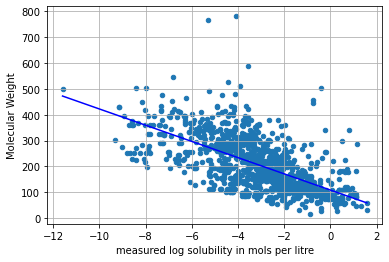

In [5]:
# Plot the raw data
ESOL_data.plot(kind='scatter', grid=True, 
               x=measured_solubility, y=molecular_weight)

# Plot the regression line to check the fit
X = np.linspace(X_sample.min(), X_sample.max())
plt.plot(X, t0 + t1 * X, "b")

plt.show()